In [12]:
import networkx as nx
from networkx.algorithms import community
from community import community_louvain
import numpy as np
import scipy as sp
import pandas as pd
import markov_clustering as mc
import pickle
import matplotlib.pyplot as plt

In [26]:
with open('target_cluster.pickle', 'rb') as f:
    target = pickle.load(f)
target = {x.replace('4932.','') for x in target}

COX1 = Q0045
COX2 = Q0250
COX3 = Q0275
COX4 = YGL187C
COX5A = YNL052W
COX* = 

In [27]:
COXproteins = ['Q0045', 'Q0250', 'Q0275', 'YGL187C', 'YNL052W', 'YLR395C']
for x in COXproteins:
    print('Is', x, 'in the target:', x in target)



Is Q0045 in the target: True
Is Q0250 in the target: True
Is Q0275 in the target: True
Is YGL187C in the target: True
Is YNL052W in the target: True
Is YLR395C in the target: True


In [2]:
## preprocessing
G0 = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)
essential_proteins = pd.read_csv("essential_proteins.csv", header = None)

for node in list(G0.nodes()):
    if node[5:] in list(essential_proteins[1]):
        G0.remove_node(node)
largest_cc = max(nx.connected_components(G0),key=len)
G = G0.subgraph(largest_cc)

In [ ]:
eigenvector = nx.eigenvector_centrality(G)

In [20]:
degree = nx.degree_centrality(G)

In [21]:
with open('betweenness_score.pickle', 'rb') as f:
    betweenness = pickle.load(f)

Text(0, 0.5, 'deg centrality')

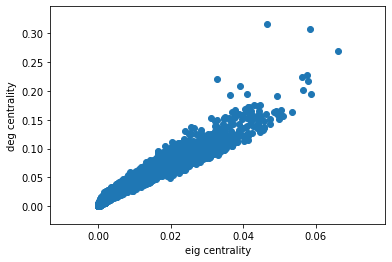

In [24]:
plt.scatter(eigenvector.values(), degree.values())
plt.xlabel("eig centrality")
plt.ylabel("deg centrality")

Text(0, 0.5, 'betweenness centrality')

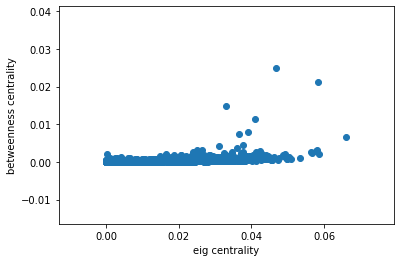

In [26]:
plt.scatter(eigenvector.values(), betweenness.values())
plt.xlabel("eig centrality")
plt.ylabel("betweenness centrality")

Text(0, 0.5, 'betweenness')

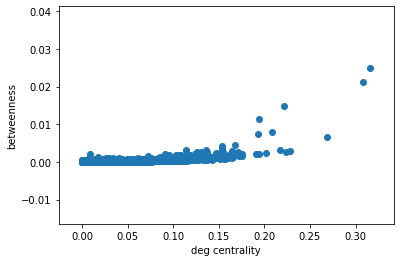

In [27]:
plt.scatter(degree.values(), betweenness.values())
plt.xlabel("deg centrality")
plt.ylabel("betweenness")